# Lab03 Exercises (20 pts)
UW Geospatial Data Analysis  
CEE467/CEWA567  
David Shean

modified by Eric Gagliano

## Introduction 

### Objectives
1. Solidify basic skills with NumPy, Pandas, and Matplotlib
2. Learn basic data manipulation, exploration, and visualizatioin with a relatively small, clean point dataset (65K points)
3. Learn a bit more about the ICESat mission, the GLAS instrument, and satellite laser altimetry
4. Explore outlier removal, grouping and clustering

### Instructions  
- For each question or task below, write some code in the empty cell and execute to preserve your output 
- If you are in the graduate section of the class, please complete at least 2/6 extra credit problems
- Work together, consult resources we've discussed, post on slack!

### Background: ICESat GLAS
The NASA Ice Cloud and land Elevation Satellite ([ICESat](https://icesat.gsfc.nasa.gov/icesat/)) was a NASA mission carrying the Geosciences Laser Altimeter System (GLAS) instrument: a space laser, pointed down at the Earth (and unsuspecting Earthlings).  

It measured surface elevations by precisely tracking laser pulses emitted from the spacecraft at a rate of 40 Hz (a new pulse every 0.025 seconds).  These pulses traveled through the atmosphere, reflected off the surface, back up through the atmosphere, and into space, where some small fraction of that original energy was received by a telescope on the spacecraft.  The instrument electronics precisely recorded the time when these intrepid photons left the instrument and when they returned.  The position and orientation of the spacecraft was precisely known, so the two-way traveltime (and assumptions about the speed of light and propagation through the atmosphere) allowed for precise forward determination of the spot on the Earth's surface (or cloud tops, as was often the case) where the reflection occurred.  The laser spot size varied during the mission, but was ~70 m in diameter. 

ICESat collected billions of measurements from 2003 to 2009, and was operating in a "repeat-track" mode that sacrificed spatial coverage for more observations along the same ground tracks over time.  One primary science focus involved elevation change over the Earth's ice sheets.  It allowed for early measurements of full Antarctic and Greenland ice sheet elevation change, which offered a detailed look at spatial distribution and rates of mass loss, and total ice sheet contributions to sea level rise.  

There were problems with the lasers during the mission, so it operated in short campaigns lasting only a few months to prolong the full mission lifetime.  While the primary measurements focused on the polar regions, many measurements were also collected over lower latitudes, to meet other important science objectives (e.g., estimating biomass in the Earth's forests, observing sea surface height/thickness over time). 

### Background: Sample GLAS dataset for CONUS
A few years ago, I (David) wanted to evaluate ICESat coverage of the Continental United States (CONUS).  The primary application was to extract a set of accurate control points to co-register a large set of high-resolution digital elevation modoels (DEMs) derived from satellite stereo imagery.  I wrote some Python/shell scripts to download, filter, and process all of the [GLAH14 L2 Global Land Surface Altimetry Data](https://nsidc.org/data/GLAH14/versions/34) granules in parallel ([https://github.com/dshean/icesat_tools](https://github.com/dshean/icesat_tools)).

The high-level workflow is here: https://github.com/dshean/icesat_tools/blob/master/glas_proc.py#L24.  These tools processed each HDF5 (H5) file and wrote out csv files containing “good” points. These csv files were concatenated to prepare the single input csv (`GLAH14_tllz_conus_lulcfilt_demfilt.csv`) that we will use for this tutorial.  

The csv contains ICESat GLAS shots that passed the following filters:
* Within some buffer (~110 km) of mapped glacier polygons from the [Randolph Glacier Inventory (RGI)](https://www.glims.org/RGI/)
* Returns from exposed bare ground (landcover class 31) or snow/ice (12) according to a 30-m Land-use/Land-cover dataset (2011 NLCD, https://www.mrlc.gov/data?f%5B0%5D=category%3Aland%20cover)
* Elevation values within some threshold (200 m) of elevations sampled from an external reference DEM (void-filled 1/3-arcsec [30-m] SRTM-GL1, https://lpdaac.usgs.gov/products/srtmgl1v003/), used to remove spurious points and returns from clouds.
* Various other ICESat-specific quality flags (see comments in `glas_proc.py` for details)

The final file contains a relatively small subset (~65K) of the total shots in the original GLAH14 data granules from the full mission timeline (2003-2009).  The remaining points should represent returns from the Earth's surface with reasonably high quality, and can be used for subsequent analysis.

## Part 0: Imports, matplotlib backend, defining a relative path
Let's use this dataset to explore some of the NumPy and Pandas functionality, and practice some basic plotting with Matplotlib.

I've provided instructions and hints, but you will need to fill in the code to generate the output results and plots.

### Import necessary modules

In [1]:
#Use shorter names (np, pd, plt) instead of full (numpy, pandas, matplotlib.pylot) for convenience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Matplotlib backend selection

In [2]:
#Use matplotlib inline to render/embed figures in the notebook for upload to github
%matplotlib inline
#Use matplotlib widget enable interactive plotting (zoom/pan) in Jupyter lab
#%matplotlib widget

### Define relative path to the GLAS data csv from week 01

In [3]:
glas_fn = '../01_Shell_Github/data/GLAH14_tllz_conus_lulcfilt_demfilt.csv'

### Do a quick check of file contents
* Use iPython functionality to run the `head` shell command on the your filename variable

In [4]:
# Student exercise: your code goes here

## Part 1: NumPy (5pts)

### Load the file
* NumPy has some convenience functions for loading text files: `loadtxt` and `genfromtxt`
* Use `loadtxt` here (simpler), but make sure you properly set the delimiter and handle the first row (see the `skiprows` option)
    * Use iPython `?` to look up reference on arguments for `np.loadtxt`
* Store the NumPy array as variable called `glas_np`

In [5]:
# Student exercise: your code goes here

### Do a quick check to make sure your array looks good

In [6]:
glas_np

array([[2.00313957e+03, 7.31266943e+05, 4.41578970e+01, ...,
        1.40052000e+03, 3.30000000e-01, 3.10000000e+01],
       [2.00313957e+03, 7.31266943e+05, 4.41501750e+01, ...,
        1.38464000e+03, 4.30000000e-01, 3.10000000e+01],
       [2.00313957e+03, 7.31266943e+05, 4.41486320e+01, ...,
        1.38349000e+03, 2.80000000e-01, 3.10000000e+01],
       ...,
       [2.00977600e+03, 7.33691238e+05, 3.78993190e+01, ...,
        1.55644000e+03, 0.00000000e+00, 3.10000000e+01],
       [2.00977600e+03, 7.33691238e+05, 3.79008690e+01, ...,
        1.55644000e+03, 0.00000000e+00, 3.10000000e+01],
       [2.00977600e+03, 7.33691238e+05, 3.79024200e+01, ...,
        1.55644000e+03, 0.00000000e+00, 3.10000000e+01]])

### How many rows and columns are in your array?

In [7]:
# Student exercise: your code goes here

(65236, 8)

### What is the datatype of your array?

In [8]:
# Student exercise: your code goes here

dtype('float64')

Note that a NumPy array typically has a single datatype, while a Pandas DataFrame can contain multiple data types (e.g., `string`, `float64`)

### Examine the first 3 rows
* Use slicing here

In [9]:
# Student exercise: your code goes here

### Examine the column with glas_z values
* You will need to figure out which column number corresponds to these values (can do this manually from header), then slice the array to return all rows, but only that column

In [10]:
# Student exercise: your code goes here

### Compute the mean and standard deviation of the glas_z values

In [11]:
# Student exercise: your code goes here

### Use print formatting to create a formatted string with these values
* Should be `'GLAS z: mean +/- std meters'` using your `mean` and `std` values, both formatted with 2 decimal places (cm-precision)
    * For example: 'GLAS z: 1234.56 +/- 12.34 meters'

In [12]:
# Student exercise: your code goes here

### Create a simple scatter plot of the `glas_z` values using Matplotlib
* Careful about correclty defining your x and y with values for latitude and longitude - easy to mix these up
* Use point color to represent the elevation
* You should see points that roughly outline the western United States
    * Does this look familiar?? 
* Label the x axis, y axis, and add a descriptive title

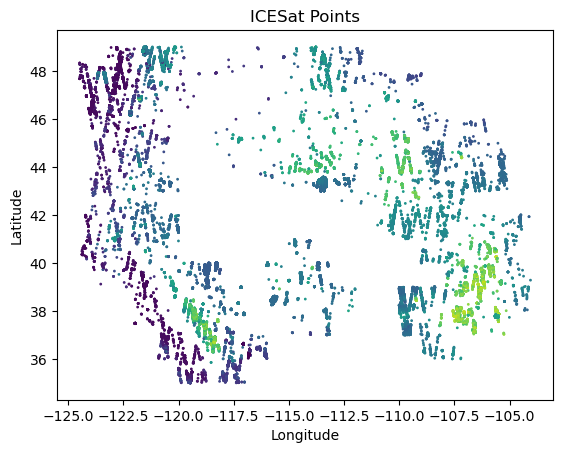

In [13]:
# Student exercise: your code goes here

## Use conditionals and fancy indexing to extract points from 2005
* Design a "filter" to isolate the points from 2005
    * Can use boolean indexing
    * Can then extract values from original array using the boolean index
* Store these points in a new NumPy array

In [14]:
# Student exercise: your code goes here

### How many points were acquired in 2005?

In [15]:
# Student exercise: your code goes here

13122

## Part 2: Pandas (5 pts)

A significant portion of the Python data science ecosystem is based on Pandas and/or Pandas data models.

>pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way towards this goal.

https://github.com/pandas-dev/pandas#main-features

If you are working with tabular data, especially time series data, please use pandas.
* A better way to deal with tabular data, built on top of NumPy arrays
* With NumPy, we had to remember which column number (e.g., 3, 4) represented each variable (lat, lon, glas_z, etc)
* Pandas allows you to store data with different types, and then reference using more meaningful labels
    * NumPy: `glas_np[:,4]`
    * Pandas: `glas_df['glas_z']`
* A good "10-minute" reference with examples: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

### Load the csv file with Pandas
* Note that pandas has excellent readers for most common file formats: https://pandas.pydata.org/pandas-docs/stable/reference/io.html
* Store as a DataFrame called `glas_df`

In [16]:
# Student exercise: your code goes here

### That was easy! Let's inspect the DataFrame

In [17]:
glas_df

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31
...,...,...,...,...,...,...,...,...
65231,2009.775995,733691.238340,37.896222,-117.044399,1556.16,1556.43,0.00,31
65232,2009.775995,733691.238340,37.897769,-117.044675,1556.02,1556.43,0.00,31
65233,2009.775995,733691.238340,37.899319,-117.044952,1556.19,1556.44,0.00,31
65234,2009.775995,733691.238340,37.900869,-117.045230,1556.18,1556.44,0.00,31


### Check data types
* Can use the DataFrame `info` method

In [18]:
# Student exercise: your code goes here

### Check the column labels
* Can use the DataFrame `columns` attribute

In [19]:
# Student exercise: your code goes here

If you are new to Python and object-oriented programming, take a moment to consider the difference between the methods and attributes of the DataFrame, and how both are accessed. 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

If this is confusing, ask your neighbor or instructor.

### Preview records using DataFrame `head` and `tail` methods

In [20]:
# Student exercise: your code goes here

In [21]:
# Student exercise: your code goes here

### Compute the mean and standard deviation for all values in each column
* Don't overthink this, should be simple (no loops!)

In [22]:
# Student exercise: your code goes here

decyear        2005.945322
ordinal      732291.890372
lat              40.946798
lon            -115.040612
glas_z         1791.494167
dem_z          1792.260964
dem_z_std         5.504748
lulc             30.339444
dtype: float64

In [23]:
# Student exercise: your code goes here

decyear         1.729573
ordinal       631.766682
lat             3.590476
lon             5.465065
glas_z       1037.183482
dem_z        1037.925371
dem_z_std       7.518558
lulc            3.480576
dtype: float64

### Apply a custom function to each column
* For this example, let's define a function to compute the Normalized Median Absolute Deviation (NMAD)
    * https://en.wikipedia.org/wiki/Median_absolute_deviation
    * For a normal distribution, this is equivalent to the standard deviation.
    * For data containing outliers, it is a more robust representation of variability.
* Then use the Pandas `apply` method to compute the NMAD for all values in each column
* Take a moment to compare the NMAD values with the standard deviation values above.

In [24]:
def nmad(a, c=1.4826):
    return np.median(np.fabs(a - np.median(a))) * c

# Note: the NMAD function is now distributed with scipy.stats: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_absolute_deviation.html

In [25]:
# Student exercise: your code goes here

decyear        2.066488
ordinal      755.079010
lat            3.885421
lon            5.798237
glas_z       632.580942
dem_z        632.136162
dem_z_std      2.001510
lulc           0.000000
dtype: float64

### Print quick stats for entire DataFrame with the `describe` method

In [26]:
# Student exercise: your code goes here

Useful, huh?  Note that the 50% statistic (50th percentile) is the median.

### Use the Pandas plotting functionality to create a 2D scatterplot of `glas_z` values
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html
* Note that labels and colorbar are automatically plotted!
* Adjust the size of the points using the `s=1` keyword
* Experiment with different color ramps:
    * https://matplotlib.org/examples/color/colormaps_reference.html (I prefer `inferno`)
* Note: If your x axis label mysteriously disappears, see: https://uwgda-jupyterbook.readthedocs.io/en/latest/resources/core_packages.html#scatterplot-x-axis-label-and-x-tick-labels-disappear-when-using-colormap

#### Color ramps
Information on how to choose a good colormap for your data: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html  
Another great resource (Thanks @fperez!): https://matplotlib.org/cmocean/  
**TL;DR** Don't use `jet`, use a perceptually uniform colormap for linear variables like elevation. Use a diverging color ramp for values where sign is important.

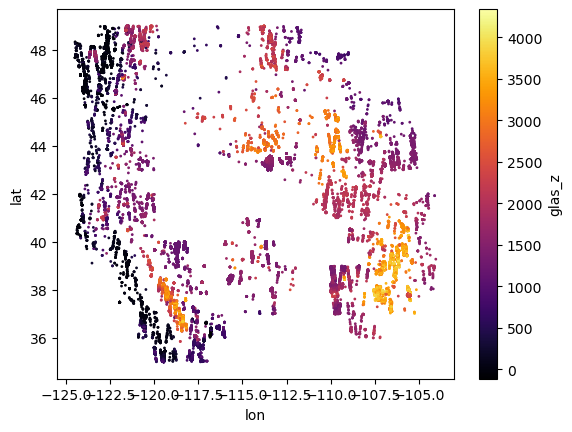

In [27]:
# Student exercise: your code goes here

### Experiment by changing the variable represented with the color ramp
* Try `decyear` or other columns to quickly visualize spatial distribution of these values.

In [28]:
# Student exercise: your code goes here

### Extra Credit: Create a 3D scatterplot
See samples here: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

Explore with the interactive tools (click and drag to change perspective). Some lag here considering number of points to be rendered, and maybe useful for visualizing small 3D datasets in the future.  There are other 3D plotting packages that are built for performance and efficiency (e.g., `ipyvolume`: https://github.com/maartenbreddels/ipyvolume)

In [29]:
# Student exercise: your code goes here

### Create a histogram that shows the number of points vs time (`decyear`)
* Should be simple with built-in method for your `DataFrame` 
* Make sure that you use enough bins to avoid aliasing.  This could require some trial and error (try 10, 100, 1000, and see if you can find a good compromise)
    * Can also consider some of the options (e.g., 'auto') here, though I have found 'auto' doesn't always work well: https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges
    * I approached this by thinking about the number of bins required for ~weekly resolution over the ~6 year mission
* You should be able to resolve the distinct campaigns during the mission (each ~1-2 months long). There is an extra credit problem at the end to group by years and play with clustering for the campaigns.

331


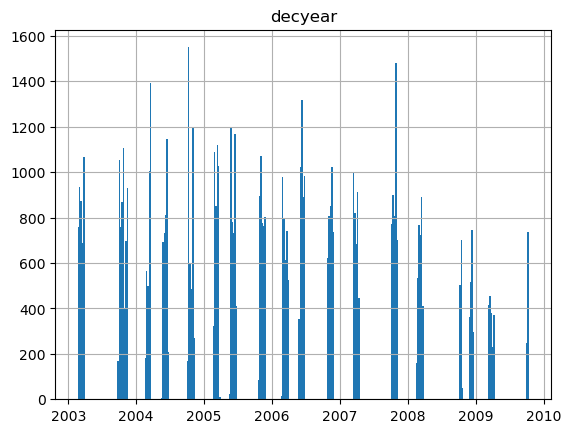

In [82]:
# Student exercise: your code goes here

### Create a histogram of all `glas_z` elevation values
* What do you note about the distribution?
* Any negative values?

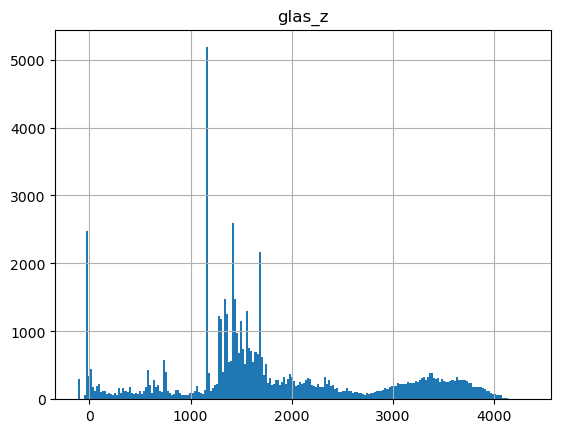

In [31]:
# Student exercise: your code goes here

### Wait a minute...negative elevations!?  Whats going on here??

#### A note on vertical datums

Note that some elevations are less than 0 m.  How can this be?

The `glas_z` values are height above (or below) the WGS84 ellipsoid (specifically, the ITRF 2000 G1150 realization). This is not the same vertical datum as mean sea level (roughly approximated by a geoid model).

A good resource explaining the details: https://vdatum.noaa.gov/docs/datums.html

### Let's check the spatial distribution of points with height below the ellipsoid
#### How many shots have a negative glas_z value?

In [32]:
# Student exercise: your code goes here

#### Create a scatterplot only using points with negative values
* Adjust the color ramp bounds to bring out more detail for these points
    * hint: see the `vmin` and `vmax` arguments for the `plot` function
* What do you notice about the spatial distribution of these points?
    * This could be tough without more context, like coastlines and state boundaries or a tiled basemap
    * We'll learn how to incorporate these next week, but feel free to add if you already have experience with this!
    * I plotted the points below zero in color over the full point dataset in gray, which helped me identify points in WA and CA
    

In [84]:
idx = glas_df['glas_z'] < 0

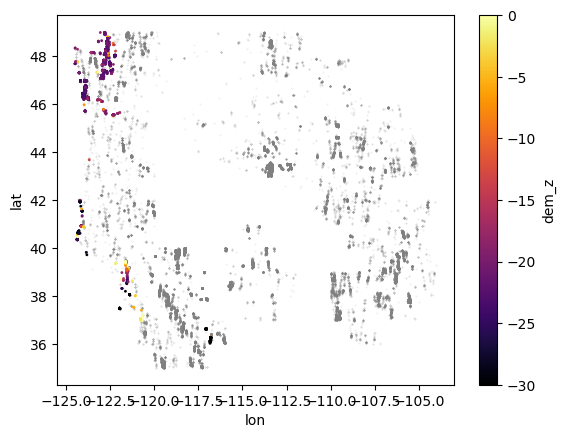

In [85]:
# Student exercise: your code goes here

### Geoid offset
Height difference between the WGS84 ellipsoid (simple shape model of the Earth) and the EGM96 geoid which approximates a geopotential (gravitational) surface, approximately equivalent to mean sea level.

![EGM96_geoid_offset_grid](https://raw.githubusercontent.com/UW-GDA/gda_course_2020/205a411cab3492450c9c0265889b54f5b9d4b699/resources/sample_img/egm96_offset.png)

Note values for the Western U.S.  We will revisit these concepts in Lab07.

### Interpretation
A lot of the points with height < 0 m in your scatterplot are near coastal sites, roughly near mean sea level.  We see that the geoid offset (difference between WGS84 ellipsoid and EGM96 geoid in this case) for CONUS is roughly -20 m.  So the ICESat GLAS point elevations near the coast will have values of around -20 m relative to the ellipsoid, even though they are around 0 m relative to the geoid (approximately mean sea level).

Another cluster of points with negative elevations is over Death Valley, CA, which is actually below sea level: https://en.wikipedia.org/wiki/Death_Valley.

If this is confusing, we will revisit when we explore raster DEMs later in the quarter. We also get into the weeds on datums in the Advanced Surveying course (ask me for details).

## Part 3: Elevation Difference Calculations, Outlier Removal (5 pts)
### Compute the elevation difference between ICESat `glas_z` and SRTM `dem_z` values

* Earlier, I mentioned that I had sampled the SRTM DEM for each GLAS shot
* Compute the difference using Pandas and store in a new column called `glas_srtm_dh`
* Remember the order of this calculation (if the difference values are negative, which dataset is higher elevation?)
* Check values with `head`

In [34]:
# Student exercise: your code goes here

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc,glas_srtm_dh
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31,-2.01
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31,2.47
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31,9.34
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31,1.39
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31,-11.03


### Compute the time difference between each ICESat point timestamp and the SRTM timestamp
* 
* Store in a new column named `glas_srtm_dt`
* The SRTM data were collected between February 11-22, 2000
    * Can assume a constant decimal year value of 2000.112 for now
* Check values with `head`

In [35]:
# Student exercise: your code goes here

### Compute *apparent* annualized elevation change rates (meters per year) from these new columns
* Store in a new column named glas_srtm_dhdt
* This will be rate of change between the SRTM timestamp (2000) and each GLAS point timestamp (2003-2009)
* This is $\frac{dh}{dt}$ : a common metric used for elevation change analysis
* Check values with `head`

In [36]:
# Student exercise: your code goes here

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc,glas_srtm_dh,glas_srtm_dt,glas_srtm_dhdt
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31,-2.01,3.027571,-0.663899
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31,2.47,3.027571,0.815836
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31,9.34,3.027571,3.084982
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31,1.39,3.027571,0.459114
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31,-11.03,3.027571,-3.643185


### Create a scatterplot of the rates
* Use a `RdBu` (Red to Blue) color ramp
* Set the color ramp limits using `vmin` and `vmax` keyword arguments to be symmetrical about 0 
    * Generate two plots with different color ramp range to bring out some detail
* Do you see outliers (values far outside the expected distribution)?
* Do you see any coherent spatial patterns in the difference values?

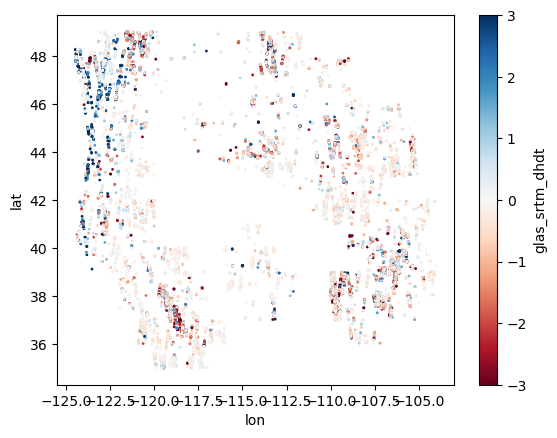

In [37]:
# Student exercise: your code goes here

### Create a histogram of the difference values
* Increase the number of bins, and limit the range to bring out detail of the distribution
* Optional: add a vertical line for the median difference using [`axvline`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)

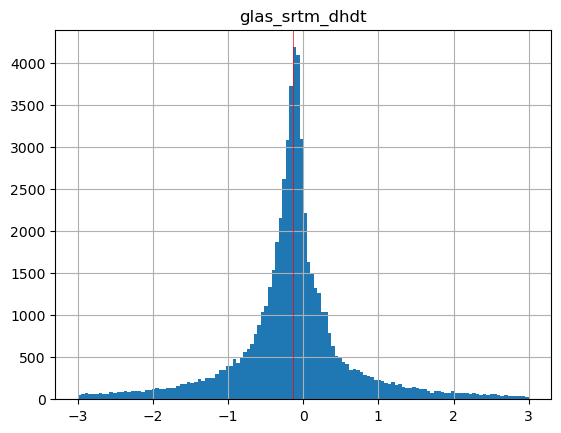

In [38]:
# Student exercise: your code goes here

### Compute the mean, median and standard deviation of the differences
* Thought question: why might we have a non-zero mean or median difference?

In [39]:
# Student exercise: your code goes here

### Create a scatterplot of elevation difference `glas_srtm_dh` values vs elevation values
* `glas_srtm_dhdt` should be on the y-axis
* `glas_z` values on the x-axis

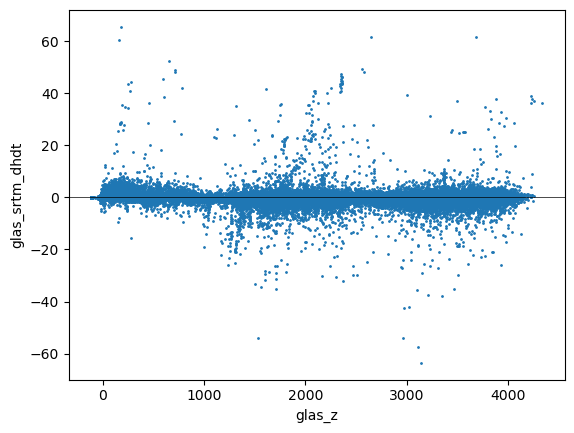

In [40]:
# Student exercise: your code goes here

### Extra Credit: Remove outliers
The initial filter in `glas_proc.py` removed GLAS points with absolute elevation difference >200 m compared to the SRTM elevations.  We expect most real elevation change signals to be less than this for the given time period.  But clearly some outliers remain.

Design and apply a filter that removes outliers.  One option is to define outliers as values outside some absolute threshold. Can set this threshold as some multiple of the standard deviation (e.g., `3*std`) about the mean. This is also known as a Z-score filter. Can also use quantile or percentile values for this threshold.

Create new plot(s) to visualize the distribution of outliers and inliers.  I've included my figure as a reference, but please experiment to develop your own, don't just try to reproduce!  Focus on the filtering strategy and create some quick plots to verify that things worked.

In [41]:
# Student exercise: your code goes here

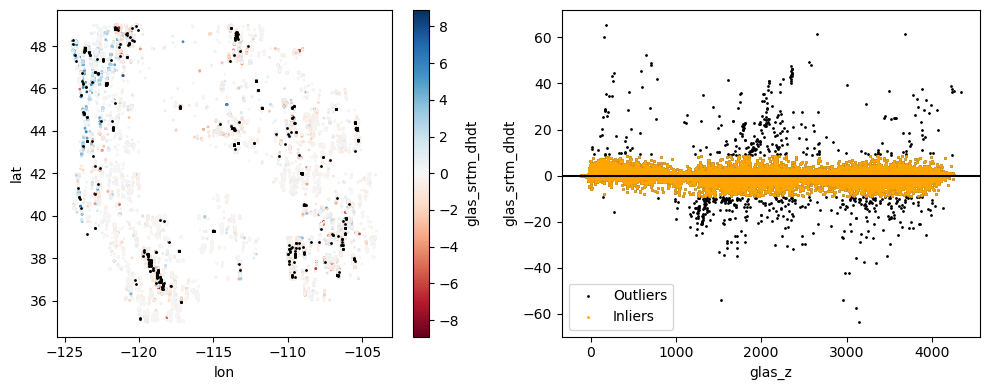

In [42]:
# Student exercise: your code goes here

### Active remote sensing confidence check

Even after removing outliers, there are still some big differences between the SRTM and GLAS elevation values.  

Please consider the following thought questions (discuss with neighbor, maybe jot down some notes in a new cell, but formal responses not required):
* Do you see systematic differences between the glas_z and dem_z values?
* Any clues from the scatterplot? (e.g., do some tracks (north-south lines of points) display systematic bias?)
* Brainstorm some ideas about what might be going on here.  Think about the nature of each sensor:
    * ICESat was a Near-IR laser (1064 nm wavelength) with a big ground spot size (~70 m in diameter)
        * Timestamps span different seasons between 2003-2009
    * SRTM was a C-band radar (5.3 GHz, 5.6 cm wavelength) with approximately 30 m ground sample distance (pixel size)
        * Timestamp was February 2000
        * Data gaps (e.g., radar shadows, steep slopes) were filled with ASTER GDEM2 composite, which blends DEMs acquired over many years ~2000-2014
* Consider different surfaces and how the laser/radar footprint might be affected:
    * Flat bedrock surface
    * Dry sand dunes
    * Steep montain topography like the Front Range in Colorado  
    * Dense vegetation of the Hoh Rainforest in Olympic National Park
* We will spend more time with SRTM during Lab07

## Part 4: Pandas Groupby (5 pts)

### Let's check to see if differences are due to our land-use/land-cover classes
* Determine the unique values in the `lulc` column and the total count for each (hint: see the `value_counts` method)
* In the introduction, I said that I initially preserved only two classes for these points (12 - snow/ice, 31 - barren land), so this isn't going to help us over forests:
    * https://www.mrlc.gov/data/legends/national-land-cover-database-2011-nlcd2011-legend

In [43]:
# Student exercise: your code goes here

### Use Pandas `groupby` to compute stats for the LULC classes
* https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html
* This is one of the most powerful features in Pandas, efficient grouping and analysis based on some values
* Compute mean, std, median, and nmad of the `glas_srtm_dhdt` for each LULC class
    * These can be computed individually, or by passing a list to the `agg` function: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#applying-multiple-functions-at-once

In [44]:
# Student exercise: your code goes here

glas_srtm_dhdt                              
               mean       std    median      nmad
lulc                                             
12        -0.383826  2.912049 -0.162833  1.281189
31        -0.173273  2.527328 -0.137926  0.421701

In [45]:
# Student exercise: your code goes here

### Prepare scatterplots for each LULC class

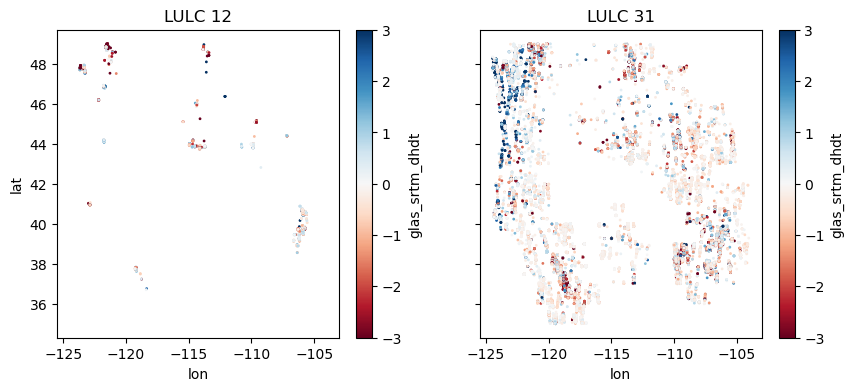

In [46]:
# Student exercise: your code goes here

### Interpretation
* The data are noisy, but do you see any statistically significant differences and/or coherent spatial patterns for points over ice vs. bare rock?
* The answer could be no! See the active remote sensing confidence check above.

In [ ]:
# Please write your answer here :)

### Extra credit: `groupby` year  
* See if you can use Pandas `groupby` to count the number of shots for each year
* Multiple ways to accomplish this
* One approach might be to create a new column with integer year, then groupby that column
    * Can modify the `decyear` values (see `floor`), or parse the Python time ordinals
* Create a bar plot showing number of shots in each year

In [47]:
# Student exercise: your code goes here

### Extra Credit: Cluster by campaign
* See if you can create an algorithm to cluster the points by campaign
    * Note, spatial coordinates should not be necessary here (remember your histogram earlier that showed the number of points vs time)
    * Can do something involving differences between sorted point timestamps
    * Can also go back and count the number of campaigns in your earlier histogram of `decyear` values, assuming that you used enough bins to discretize!
    * K-Means clustering is a nice option: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* Compute the number of shots and length (number of days) for each campaign
* Compare your answer with table here: https://nsidc.org/data/icesat/laser_op_periods.html (remember that we are using a subset of points over CONUS, so the number of days might not match perfectly)

In [48]:
# Student exercise: your code goes here

In [49]:
# Student exercise: your code goes here

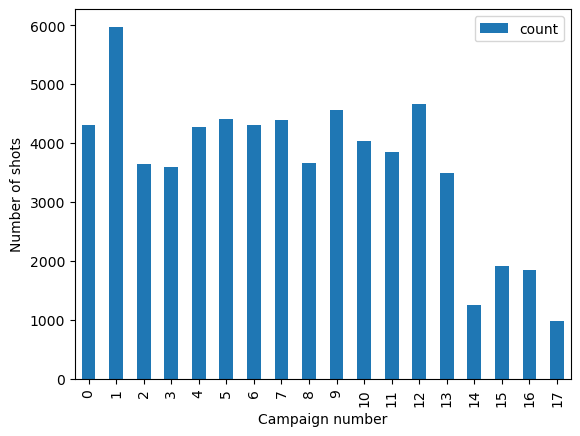

In [50]:
# Student exercise: your code goes here

### Extra Credit: Annual scatterplots
* Create a figure with multiple subplots showing scatterplots of points for each year

In [86]:
# Student exercise: your code goes here

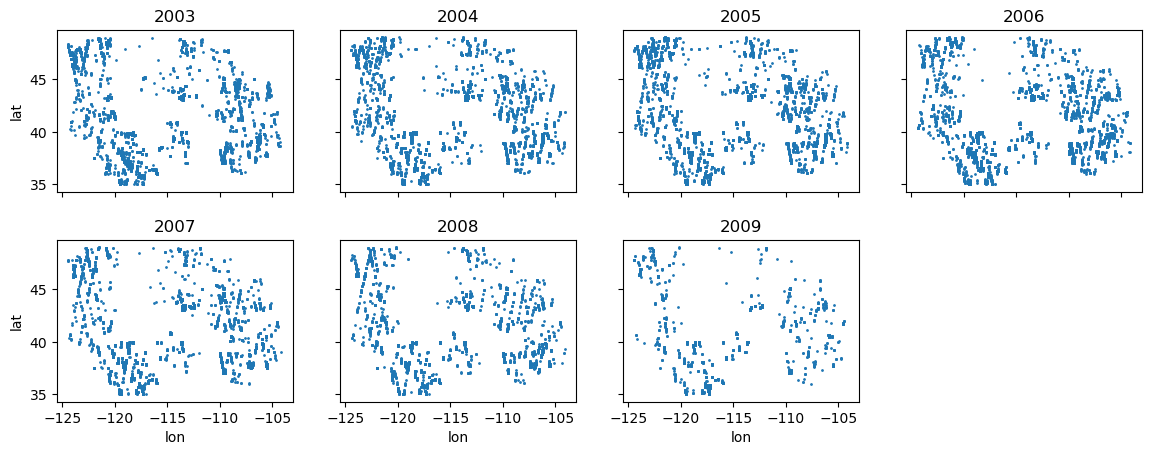

In [72]:
# Student exercise: your code goes here

### Extra Credit: Campaign scatterplots
* Create a figure with multiple subplots showing scatterplots of points for each campaign

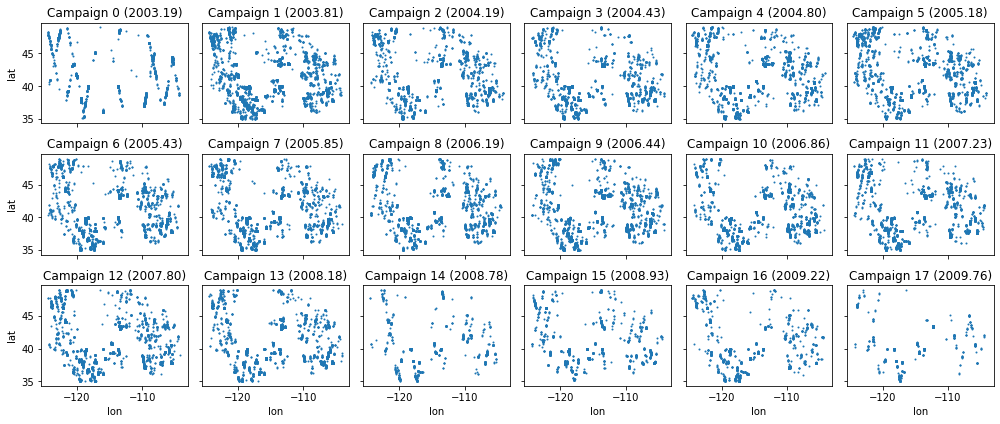

In [ ]:
# Student exercise: your code goes here

## Submission
- Save the completed notebook (make sure to fully run the notebook and check all cell output is visible)
- Use the `git add; git commit -m 'message'; git push` workflow to push your work to the remote repository 
    - ideally you've been using add / commit / push as you make progress on this notebook
- Check the remote repository to check all of the files you want to submit have been pushed
- When you have completed your last push, submit the url pointing to your Github repository to the corresponding Canvas assignment